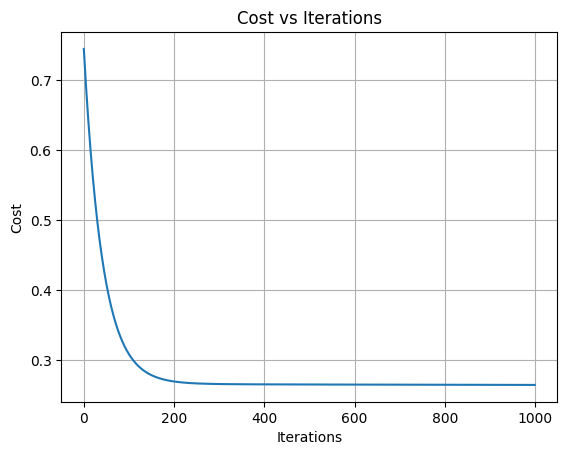

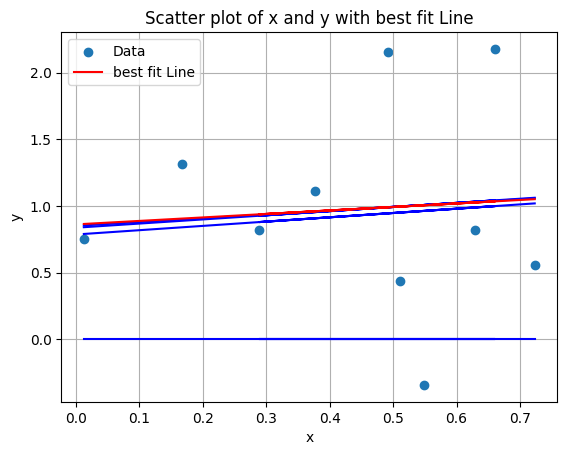

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
import pandas as pd
from tabulate import tabulate
import plotly.graph_objects as go
x=np.random.rand(10,1)
y=2*x+np.random.randn(10,1)
finaltheta0=0
finaltheta1=0
costs=[]
thetas1=[]
thetas0=[]
def h(theta0,theta1,x):
  return(theta0+(theta1*x))
def j(theta0,theta1,x,y):
  m=len(x)
  hyp=h(theta0,theta1,x)
  return (1/(2*m))*np.sum(np.square(hyp-y))

def gradientdes(x,y):
  alpha=0.01
  iterations=1000
  theta0=theta1=0
  n=len(x)
  costprev=0
  table=[]
  for i in range(iterations):
    cost=j(theta0,theta1,x,y)
    costs.append(cost)
    thetas1.append(theta1)
    thetas0.append(theta0)
    table.append([cost, theta0, theta1])
    pred=h(theta0,theta1,x)
    theta0der=-(1/n)*np.sum(y-pred)
    theta1der=-(1/n)*np.sum(x*(y-pred))
    theta0=theta0-(alpha*theta0der)
    theta1=theta1-(alpha*theta1der)

    if math.isclose(cost,costprev,rel_tol=1e-19):
      break
    costprev=cost
  df=pd.DataFrame(table, columns=['Cost', 'Theta0', 'Theta1'])
  #print(tabulate(df, headers='keys', tablefmt='fancy_grid'))
  finaltheta0=theta0
  finaltheta1=theta1
  return df,finaltheta0,finaltheta1,iterations
df,finaltheta0,finaltheta1,iter=gradientdes(x,y)

costs = np.array(costs)
thetas0 = np.array(thetas0)
thetas1 = np.array(thetas1)
theta0_range = np.linspace(-2, 2, 100)
theta1_range = np.linspace(-2, 2, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_range, theta1_range)
cost_vals = np.zeros_like(theta0_grid)

for i in range(len(theta0_range)):
    for z in range(len(theta1_range)):
        cost_vals[i, z] = j(theta0_range[i], theta1_range[z], x, y)

fig = go.Figure(data=[go.Surface(z=cost_vals, x=theta0_range, y=theta1_range)])
fig.update_layout(scene=dict(xaxis_title='Theta0', yaxis_title='Theta1', zaxis_title='Cost'))

fig.add_trace(go.Scatter3d(x=[0], y=[0], z=[costs[0]], mode='markers', name='Initial Starting Point', marker=dict(size=20, color='red')))

fig.add_trace(go.Scatter3d(x=[thetas0[(iter-1)]], y=[thetas1[(iter-1)]], z=[costs[(iter-1)]], mode='markers', name='Final Point', marker=dict(size=20, color='green')))

fig.add_trace(go.Scatter3d(x=thetas0, y=thetas1, z=costs, mode='markers', name='Optimization Path', marker=dict(size=10, color='black')))

fig.update_layout(
    width=850,
    height=600
)

fig.update_layout(
    legend=dict(
        orientation='h',
        x=0.5,
        y=1.1,
        bgcolor='rgba(255, 255, 255, 0.5)',
        bordercolor='black',
        borderwidth=1,
        font=dict(
            family='Arial',
            size=12,
            color='black'
        )
    )
)
fig.show()


plt.plot(df.index, df['Cost'])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.grid(True)
plt.show()

plt.scatter(x, y, label='Data')
end = iter/4
for i in range(0, iter, int(end)):
  plt.plot(x, thetas0[i] + thetas1[i] * x, color='blue')
plt.plot(x, finaltheta0 + finaltheta1 * x, color='red', label='best fit Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y with best fit Line')
plt.legend()
plt.grid(True)
plt.show()